# Workbook 1 - Data Fitting using sasmodels

As previously, let's set up our environment first.

In [1]:
!pip install bumps
!pip install numpy
!pip install sasmodels
!pip install matplotlib

!git clone https://github.com/timsnow/advanced_sas_training_course
%cd 'advanced_sas_training_course/03 - SAS Software'

The first step is to import some packages for use in this script - the last one of which has been customly written for this training course.

In [2]:
from numpy import loadtxt
from matplotlib import pyplot as plt
from DataFitter1D import DataFitter1D

Then, as before, we shall use `numpy`s `loadtxt()` function to load some pre-exising data into the script and format it such that we subsequently have access to the `x_data` and `y_data` as arrays.

In [3]:
overall_data = loadtxt('data/CylinderData1D.dat')
x_data = overall_data[:,0]
y_data = overall_data[:,1]

Then we can instanciate the DataFitter1D class and pass it the data:

In [4]:
dataFitter = DataFitter1D()
dataFitter.loadData(xData = x_data, yData = y_data)


2021-06-02 14:57:44,501 - sasmodels - WARNING - No dq data given (dx). Uncertainties of 5 % have been added.
2021-06-02 14:57:44,502 - sasmodels - WARNING - No intensity uncertainties provided (dy). Uncertainties of 5 % have been added.


Note that this class has *logging* - it's passing us some warnings about our data as we haven't supplied any uncertainty data for either our *q* dataset (the `x_axis`) or the *I* dataset (the `y_axis`). 

However, for the benefit of the fitting engine a 5% uncertainty has been added on our behalf; to prevent this from being added we *really* should pass the DataFitter1D class some uncertaintites...

Next up, we load in some starting fitting parameters using the `parameterParserFromTextFile()` function:

In [5]:
dataFitter.parameterParserFromTextFile("parameters/fit_parameters.txt")

As we can see by opening the text file in questions this appears to be a comma separated dictionary!

Naturally, creating this by hand is going to be a *pain*, luckily we can create these in SasView and then use either the 'Save Params to File' option in the 'Edit' menu.

However; that's not all. There's also a 'Copy Params' option in the 'Edit' menu which is turns out we can use as well by making use of the `parameterParserFromString()` function.

In [6]:
dataFitter.parameterParserFromString("sasview_parameter_values:model_name,cylinder:scale,False,1.0,None,0.0,inf,():background,False,0.001,None,-inf,inf,():sld,False,4,None,-inf,inf,():sld_solvent,False,1,None,-inf,inf,():radius,True,10,None,1.0,50.0,():length,True,400,None,1.0,2000.0,():is_data,False:tab_index,1:is_batch_fitting,False:data_name,[]:data_id,[]:tab_name,M1:q_range_min,0.0005:q_range_max,0.5:q_weighting,0:weighting,0:smearing,0:smearing_min,None:smearing_max,None:polydisperse_params,False:magnetic_params,False:chainfit_params,False:2D_params,False:fitpage_category,Cylinder:fitpage_model,cylinder:fitpage_structure,None:")

With both a dataset loaded *and* some initial parameters loaded we can now fit the data:

In [7]:
dataFitter.fitData()

Now that we've fitted the data we can plot it using `matplotlib`

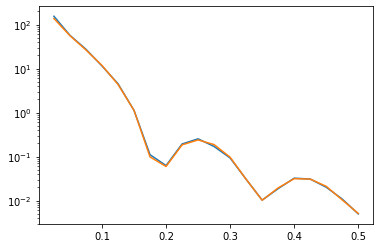

In [8]:
plt.plot(x_data, y_data)
plt.plot(dataFitter.dataHolder.x, dataFitter.fittingProblem.fitness.theory())
plt.yscale('log')
plt.show()

However, whereas we can see that the fit is good - unlike lmfit we don't have a `fit_report()` function with the DataFitter1D class. So, we shall have to do a bit of legwork in order to extract that information out and either print it to the console or add it to the plot (we shall do the latter):

In [9]:
modelType = dataFitter.fittingProblem.fitness.model.sasmodel.info.id.capitalize()
modelRadius = "{:.2f}".format(dataFitter.fittingProblem.fitness.model.radius.value)
modelLength = "{:.2f}".format(dataFitter.fittingProblem.fitness.model.length.value)

The above is a bit dense so let's go through it line by line:

 - modelType - Within the fittingProblem there's a sasmodel ID for the model fitted which we can extract by navigating to the ID; we are then calling the capitalize() function on this string to capitalise the first letter of the string
 - modelRadius - Within the fittingProblem we can retrieve the radius by navigating to its location, the `"{:.2f}".format()` function formats the floating point number that is obtained into a string form of the number accurate to *2* decimal places
 - modelLength - Similarly, we can retrieve the length by navigating to its location and the formatting the number into a string accurate to *2* decimal places
  
Now we can take this information and add it to the plot's title so that we have some information about the fit performed:

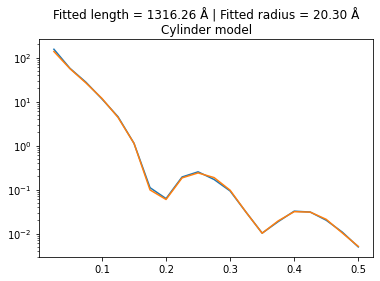

In [10]:
plt.figure("Fitted Data Plot")
plt.title(r"Fitted length = " + (modelLength) + " Å | Fitted radius = " + modelRadius + " Å\n" + modelType + " model")

plt.plot(x_data, y_data)
plt.plot(dataFitter.dataHolder.x, dataFitter.fittingProblem.fitness.theory())
plt.yscale('log')
plt.show()

Equally well, we could iterate through the items in dataFitter.fittingProblem.fitness.model and print these out one by one as a fitting report.

In [13]:
print('Fitting report for ' + dataFitter.fittingProblem.fitness.model.sasmodel.info.id.capitalize())
for key, value in dataFitter.fittingProblem.fitness.model.parameters().items():
    print(key + ': ' + str(value.value))

Fitting report for Cylinder
scale: 1.0
background: 0.001
sld: 4.0
sld_solvent: 1.0
radius: 20.299289412387246
radius_pd: 0.0
radius_pd_n: 35.0
radius_pd_nsigma: 3.0
length: 1316.2615446691434
length_pd: 0.0
length_pd_n: 35.0
length_pd_nsigma: 3.0
theta: 60
theta_pd: 0.0
theta_pd_n: 35.0
theta_pd_nsigma: 3.0
phi: 60
phi_pd: 0.0
phi_pd_n: 35.0
phi_pd_nsigma: 3.0
up_frac_i: 0.0
up_frac_f: 0.0
up_angle: 0.0
sld_M0: 0.0
sld_mtheta: 0.0
sld_mphi: 0.0
sld_solvent_M0: 0.0
sld_solvent_mtheta: 0.0
sld_solvent_mphi: 0.0


## Further reading

 - [sasmodels package](https://www.sasview.org/docs/dev/sasmodels-api/sasmodels.html)
    
 - [sasmodels model reference guide](https://www.sasview.org/docs/dev/sasmodels-api/modules.html)